# Hello!
Currently, I am mostly seeking feedback regarding my general figure choices. They are currently set as scatter plots with symbols representing species and colors representing nutrients (when applicable). I'm not sure if there is a better way to display all of this information, but this is what I have come up with right now. Formatting is not final.

Thanks!!

# Part 2
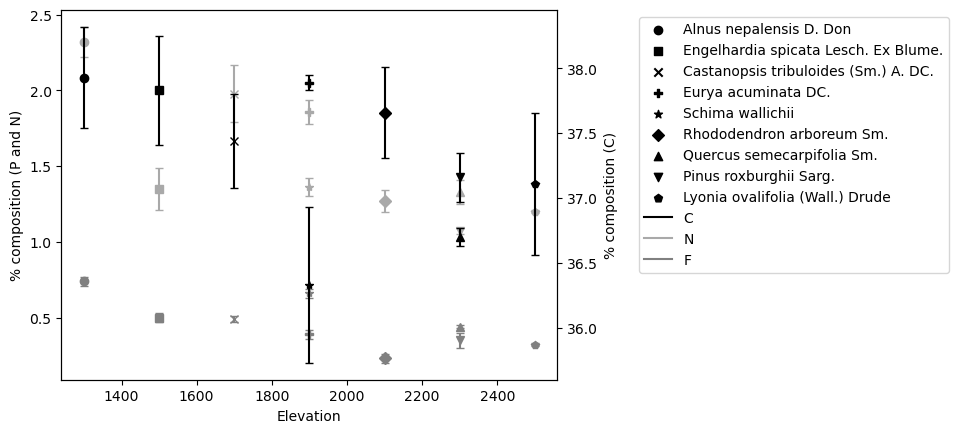

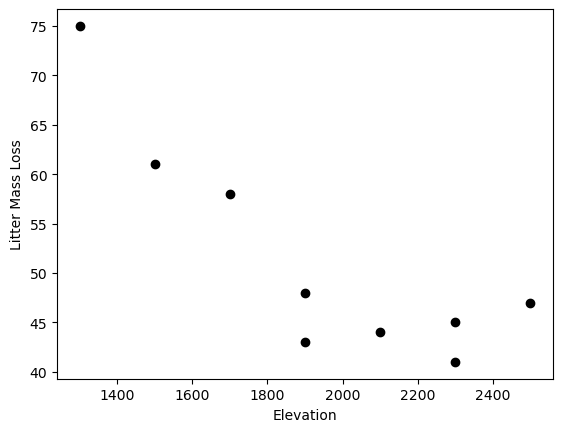

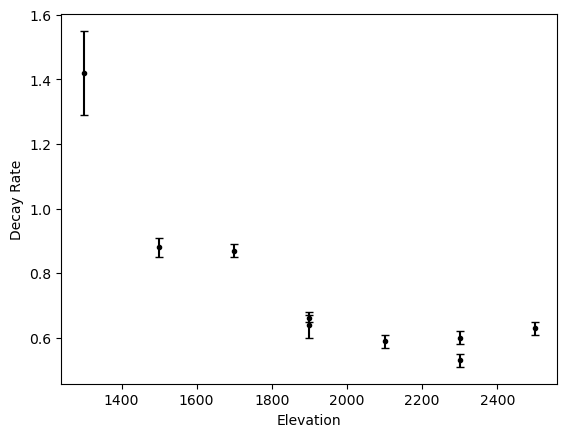

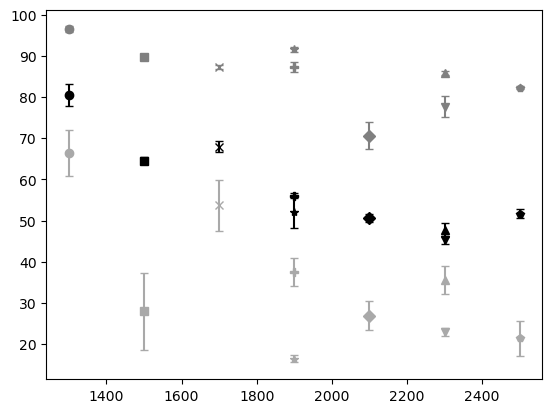

# Part 3

$Flux$ $CO_2 = K_{CO_2}(CO_{2 atm}-CO_{2 stream}) = 2.3m/d(1.3*10^{-8}M-5*10^{-5}M)=-1.15*10^{-4}M*m/d$

$Q = 0.05m/s=0.05m/s*60s/min*60min/hr*24hr/d=4320m/d$

$Released$ $C_{stream}= -1.15*10^{-4}M*m/d * 4320m/d / (100m*0.5m)=-0.00994M/d= -3.63M/d$

$Released$ $C_{mass}=-3.63M/d * 44.01g/M= -160g/yr = -0.160kg/yr$

# Code for Generating Figures

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
#Import data
df = pd.read_csv('Bohara_etal_data-1.csv')
df

,Tree species,elevation,C,C std. err,N,N std. Err,P,P std. Err,Litter Mass Loss,K,K std. Err,C Release,C rel std. err,N Release,N rel std. err,P Release,P rel std. err
0,Alnus nepalensis D. Don,1300,37.93,0.39,2.32,0.10,0.74,0.03,75,1.42,0.13,80.54,2.59,66.46,5.52,96.51,0.66
1,Engelhardia spicata Lesch. Ex Blume.,1500,37.83,0.42,1.35,0.14,0.50,0.03,61,0.88,0.03,64.54,0.82,27.92,9.44,89.77,0.31
2,Castanopsis tribuloides (Sm.) A. DC.,1700,37.44,0.36,1.98,0.19,0.49,0.02,58,0.87,0.02,67.96,1.33,53.70,6.27,87.30,0.57
3,Eurya acuminata DC.,1900,37.89,0.06,1.86,0.08,0.39,0.03,43,0.66,0.01,56.05,0.58,37.53,3.48,87.40,1.24
4,Schima wallichii,1900,36.33,0.60,1.36,0.06,0.66,0.03,48,0.64,0.04,52.03,3.89,16.43,0.91,91.65,0.61
5,Rhododendron arboreum Sm.,2100,37.66,0.35,1.27,0.07,0.23,0.03,44,0.59,0.02,50.62,0.87,26.84,3.53,70.67,3.38
6,Quercus semecarpifolia Sm.,2300,36.70,0.07,1.33,0.08,0.44,0.01,41,0.60,0.02,47.65,1.73,35.59,3.43,85.78,0.46
7,Pinus roxburghii Sarg.,2300,37.16,0.19,1.07,0.02,0.35,0.05,45,0.53,0.02,45.23,0.96,23.00,1.01,77.69,2.54
8,Lyonia ovalifolia (Wall.) Drude,2500,37.11,0.55,1.20,0.01,0.32,0.01,47,0.63,0.02,51.65,1.09,21.39,4.31,82.29,0.42


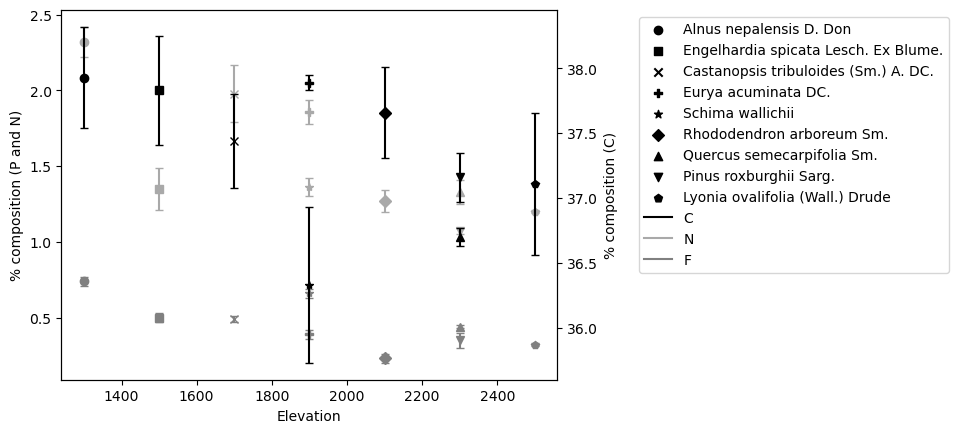

In [69]:
markers = ('o','s','x','P','*','D','^','v','p')
colors = ('o','s','x','P','*','D','^','v','p')

fig,ax = plt.subplots()
ax2=ax.twinx()
leg_el = []
leg_name=[]

for index, row in df.iterrows():
    el = ax2.errorbar(row['elevation'], row['C'],yerr=row['C std. err'],capsize=3, color='black', marker=markers[index])
    ax.errorbar(row['elevation'], row['N'],yerr=row['N std. Err'],capsize=3, color='darkgray', marker=markers[index])
    ax.errorbar(row['elevation'], row['P'],yerr=row['P std. Err'],capsize=3, color='gray', marker=markers[index])
    leg_el.append(ax.scatter([],[],color='black', marker=markers[index]))
    leg_name.append(row['Tree species'])
ax.set_xlabel('Elevation')
ax.set_ylabel('% composition (P and N)')
ax2.set_ylabel('% composition (C)')
#ax.scatter(df['elevation'], df['N'], color='gray', marker = 'o')
#ax.scatter(df['elevation'], df['P'], color='lightgray', marker = 'o')
#ax2.scatter(df['elevation'], df['C'], color='black', marker = 'o')
leg_el.append(Line2D([0],[0],color='black'))
leg_el.append(Line2D([0],[0],color='darkgray'))
leg_el.append(Line2D([0],[0],color='gray'))
leg_name.append('C')
leg_name.append('N')
leg_name.append('F')
ax.legend(leg_el, leg_name,bbox_to_anchor=(1.15, 1.0), loc='upper left')


Text(0, 0.5, 'Litter Mass Loss')

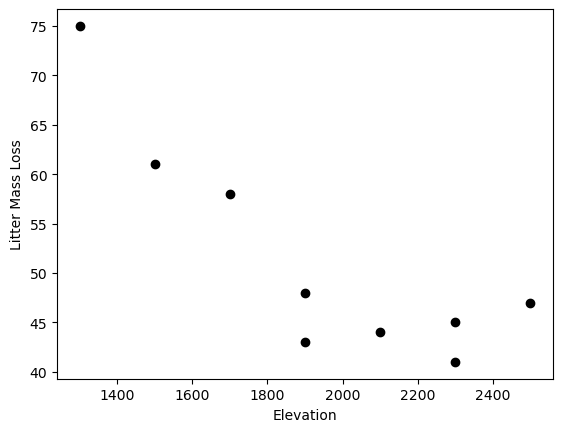

In [30]:

fix,ax = plt.subplots()

ax.scatter(df['elevation'], df['Litter Mass Loss'], color='black', marker='o')

ax.set_xlabel('Elevation')
ax.set_ylabel('Litter Mass Loss')
#    ax.errorbar(row['elevation'], row['N'],yerr=row['N std. Err'],capsize=3, color='darkgray', marker=markers[index])
#    ax.errorbar(row['elevation'], row['P'],yerr=row['P std. Err'],capsize=3, color='gray', marker=markers[index])

#ax.scatter(df['elevation'], df['N'], color='gray', marker = 'o')
#ax.scatter(df['elevation'], df['P'], color='lightgray', marker = 'o')
#ax2.scatter(df['elevation'], df['C'], color='black', marker = 'o')



Text(0, 0.5, 'Decay Rate')

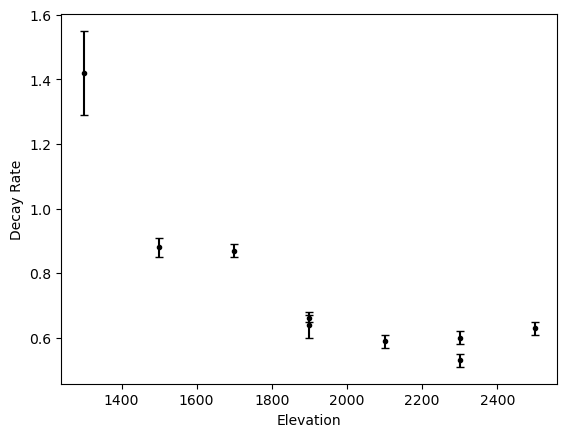

In [36]:

fix,ax = plt.subplots()

ax.errorbar(df['elevation'], df['K'], yerr=df['K std. Err'], capsize=3, color='black', marker='.', ls='none')

ax.set_xlabel('Elevation')
ax.set_ylabel('Decay Rate')
#    ax.errorbar(row['elevation'], row['N'],yerr=row['N std. Err'],capsize=3, color='darkgray', marker=markers[index])
#    ax.errorbar(row['elevation'], row['P'],yerr=row['P std. Err'],capsize=3, color='gray', marker=markers[index])

#ax.scatter(df['elevation'], df['N'], color='gray', marker = 'o')
#ax.scatter(df['elevation'], df['P'], color='lightgray', marker = 'o')
#ax2.scatter(df['elevation'], df['C'], color='black', marker = 'o')



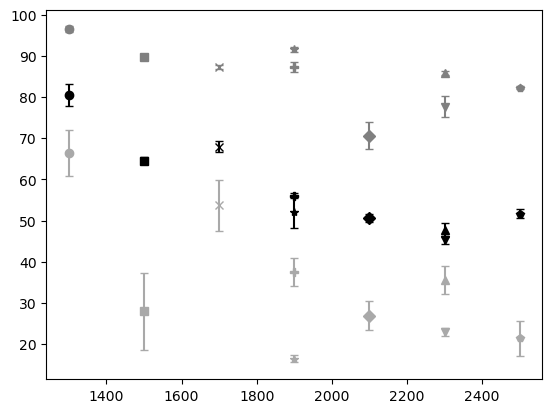

In [49]:
markers = ('o','s','x','P','*','D','^','v','p')
colors = ('o','s','x','P','*','D','^','v','p')

fix,ax = plt.subplots()

for index, row in df.iterrows():
    ax.errorbar(row['elevation'], row['C Release'],yerr=row['C rel std. err'],capsize=3, color='black', marker=markers[index])
    ax.errorbar(row['elevation'], row['N Release'],yerr=row['N rel std. err'],capsize=3, color='darkgray', marker=markers[index])
    ax.errorbar(row['elevation'], row['P Release'],yerr=row['P rel std. err'],capsize=3, color='gray', marker=markers[index])
